# Reporte de Resultados

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


### Metodología:

En esta documento comparamos experimentos realizados sobre el dataset de 'leukemia' en su version original y aumentada: 

#### Grupo de experimentos con dataset original.
- '0017' utilizando dataset original, cromosoma activo 0.1, 30 pruebas.

#### Grupo de experimentos con dataset aumentado.
- '0014' realizado con dataset aumentado en 2000 observaciones mediante un VAE, cromosoma activo 0.1, 18 pruebas.  
  


In [58]:
data = pd.read_csv('experiments_results.csv')

In [59]:
data.tail(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
338,mandelon_base_0023_29,2024-05-21,3experiments_originaldata,/root/ealab/expga1,100,1,0.75,30,2000,0.267,500,0.533,0.864,28,0.785,0.864,0.785,28.0,0.0,0.0,0.0,0.864,0.785,28
339,gisette_base_0022_0,2024-05-22,experiments_original,/root/ealab/expga1,100,1,0.75,30,3000,0.480,4999,0.960,0.935,411,0.952,0.935,0.952,411.0,0.0,0.0,0.0,0.935,0.952,411
340,gisette_base_0022_1,2024-05-22,experiments_original,/root/ealab/expga1,100,1,0.75,30,3000,0.480,4999,0.960,0.940,423,0.964,0.940,0.964,423.0,0.0,0.0,0.0,0.940,0.964,423


In [38]:
data.columns

Index(['experiment_name', 'date', 'description', 'current_dir', 'POP_SIZE',
       'PROB_MUT', 'PX', 'GMAX', 'DAT_SIZE', 'all_features_fitness',
       'all_feature_ngenes', 'all_feature_acc', 'elite_fitness',
       'elite_ngenes', 'elite_acc', 'pob_fitness_avg', 'pob_accuracy_avg',
       'pob_ngenes_avg', 'pob_fitness_std', 'pob_accuracy_std',
       'pob_ngenes_std', 'pob_fitness_max', 'pob_accuracy_max',
       'pob_ngenes_max'],
      dtype='object')

In [69]:
mandelon = data[data['experiment_name'].str.contains('mandelon')]
# extract the firts 18 letters of the experiment name
mandelon['experiment_group'] = mandelon['experiment_name'].apply(lambda x: x[:18])
# count the unique value on the column 'experiment_name'
mandelon['experiment_group'].value_counts()

/tmp/ipykernel_35835/1674984077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandelon['experiment_group'] = mandelon['experiment_name'].apply(lambda x: x[:18])


experiment_group
mandelon_synthetic    30
mandelon_base_0023    30
mandelon_base_0017    19
mandelon_base_0004    10
mandelon_base_0021     2
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos madelon_base_004 por ser un experimento de 10 pruebas iniciales.

In [70]:
# Remove 'leukemia_base_0008' from the data
mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0004']
mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0021']


In [71]:
# Compare original data vs augmented data
original_data = ['mandelon_base_0017', 'mandelon_base_0023']

In [72]:
# rename experiment names label 
mandelon = mandelon.replace('mandelon_base_0017', 'mandelon_original')
mandelon = mandelon.replace('mandelon_base_0023', 'mandelon_original')

# Resultados

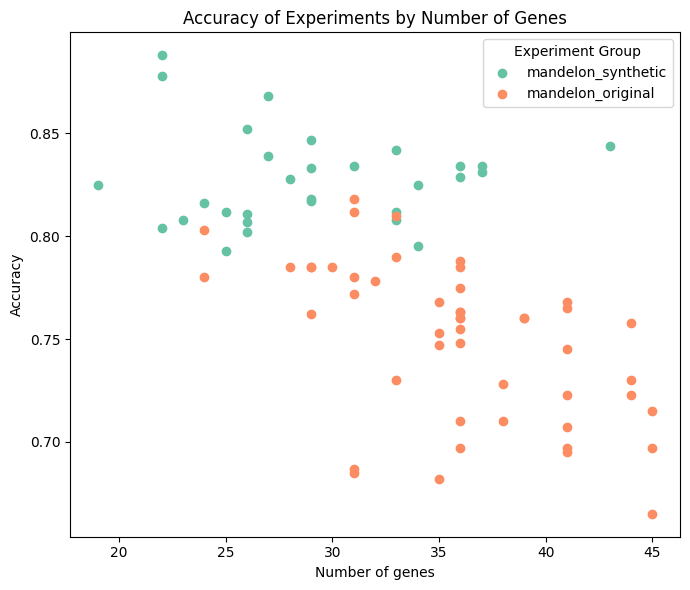

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(mandelon['experiment_group'])

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = mandelon[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)

# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Gráfico de resultados por grupo de experimentos

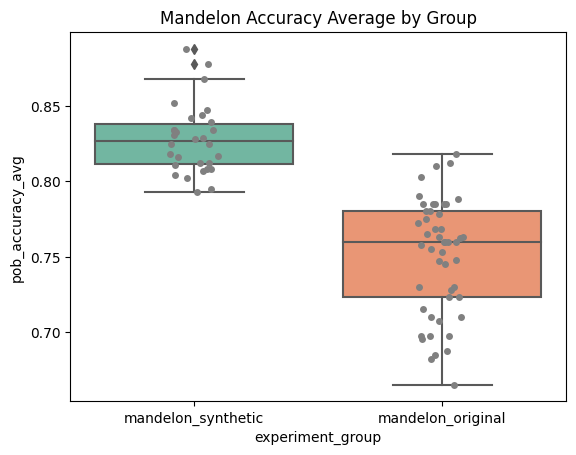

In [74]:
# plot the leukemias accuracy average by group
# set the same palette for all plots
sns.set_palette("Set2")
sns.boxplot(x='experiment_group', y='pob_accuracy_avg', data=mandelon)
# add data point in grey
sns.stripplot(x='experiment_group', y='pob_accuracy_avg', data=mandelon, color='grey')
plt.title('Mandelon Accuracy Average by Group')
plt.show()


# Gisette

In [83]:
gisette = data[data['experiment_name'].str.contains('gisette')]
# extract the firts 18 letters of the experiment name
gisette['experiment_group'] = gisette['experiment_name'].apply(lambda x: x[:17])
# count the unique value on the column 'experiment_name'
gisette['experiment_group'].value_counts()

/tmp/ipykernel_35835/3447728379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gisette['experiment_group'] = gisette['experiment_name'].apply(lambda x: x[:17])


experiment_group
gisette_base_0005    13
gisette_base_0020     2
gisette_base_0022     2
Name: count, dtype: int64

#### Experimentos excluidos

Excluiremos del análisis experimentos ....

In [ ]:
# Remove 'leukemia_base_0008' from the data
# mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0004']
# mandelon = mandelon[mandelon['experiment_group'] != 'mandelon_base_0021']


In [84]:
# Compare original data vs augmented data
original_data = ['gisette_base_0020', 'gisette_base_0022']

In [87]:
# rename experiment names label 
gisette = gisette.replace('gisette_base_0020', 'gisette_original')
gisette = gisette.replace('gisette_base_0022', 'gisette_original')
gisette = gisette.replace('gisette_base_0005', 'gisette_synthetic')

In [ ]:
gisette

# Resultados

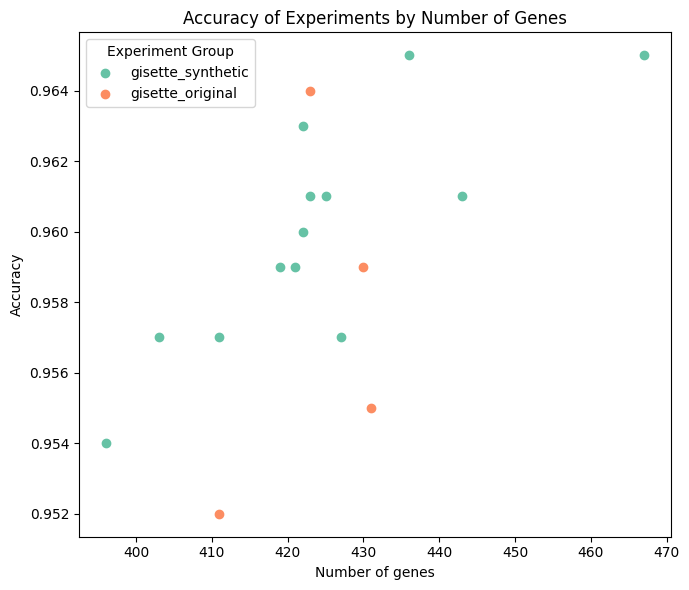

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(gisette['experiment_group'])
# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Plot all data without condition on 'pob_ngenes_avg'
for i, label in enumerate(labels):
    group_data = gisette[groups == i]
    plt.scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)


# Set plot titles and labels
plt.title('Accuracy of Experiments by Number of Genes')
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend(title="Experiment Group")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Gráfico de resultados por grupo de experimentos

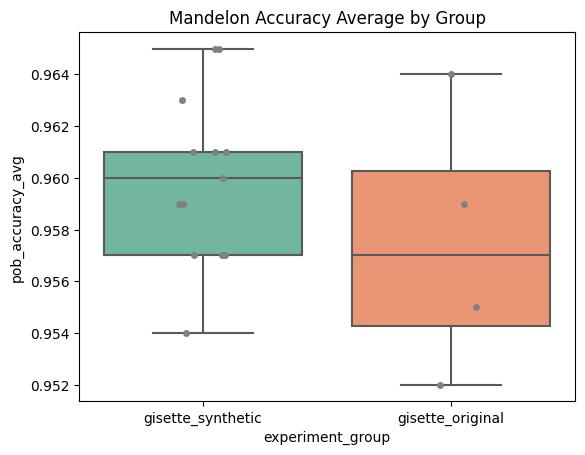

In [96]:
# plot the leukemias accuracy average by group
# set the same palette for all plots
sns.set_palette("Set2")
sns.boxplot(x='experiment_group', y='pob_accuracy_avg', data=gisette)
# add data point in grey
sns.stripplot(x='experiment_group', y='pob_accuracy_avg', data=gisette, color='grey')
plt.title('Gisette Accuracy Average by Group')
plt.show()
